# Data analysis with Pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Loading pandas and our data

In [2]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# select an interactive "notebook" plot style
%matplotlib notebook
# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv('../predavanja/obdelani-podatki/filmi.csv', index_col='id')

Let's take a look at the data.

In [3]:
filmi.head(10)

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
21749,Luči velemesta,87,1931,8.5,NaN,138228,19181.0,"With the aid of a wealthy erratic tippler, a d..."
22100,M - mesto isce morilca,117,1931,8.4,NaN,121443,28877.0,When the police in a German city are unable to...
24216,King Kong,100,1933,7.9,90.0,71806,10000000.0,A film crew goes to a tropical island for an e...
25316,Zgodilo se je neke noci,105,1934,8.1,87.0,81390,NaN,A spoiled heiress running away from her family...


## Inspecting the data

Sort the data by rating.

In [4]:
filmi.sort_values('ocena')

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
1213644,Disaster Movie,87,2008,1.9,15.0,80828,14190901.0,"Over the course of one evening, an unsuspectin..."
799949,Velik film,86,2007,2.3,17.0,96182,39739367.0,A comedic satire of films that are large in sc...
185183,Battlefield Earth,118,2000,2.4,9.0,71149,21471685.0,It's the year 3000 A.D.; the Earth is lost to ...
1098327,Dragonball Evolution,85,2009,2.6,45.0,63966,9353573.0,The young warrior Son Goku sets out on a quest...
...,...,...,...,...,...,...,...,...
71562,"Boter, II. del",202,1974,9.0,90.0,950252,57300000.0,The early life and career of Vito Corleone in ...
468569,Vitez teme,152,2008,9.0,84.0,1972591,534858444.0,When the menace known as the Joker emerges fro...
68646,Boter,175,1972,9.2,100.0,1372528,134966411.0,The aging patriarch of an organized crime dyna...


Extract the 'ocena' column.

In [5]:
filmi.ocena

id
12349      8.3
13442      8.0
15864      8.2
17136      8.3
17925      8.2
          ... 
5813916    9.4
5988370    1.8
6294822    7.2
6644200    7.7
7784604    7.3
Name: ocena, Length: 2500, dtype: float64

There is a difference between `filmi['ocena']` and `filmi[['ocena']]`:

In [14]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


The columns of dataframes are `Series`. Using single brackets extracts a `Series` (think: a vector, no further structure), double brackets extracts a sub-`DataFrame`. Most of the operations we perform (grouping, joining, plotting, filtering, ...) operate on dataframes. 

A `Series` is used for example if we want to add a column to a dataframe.

Round the extracted rating series to the nearest integer using the `round()` function.

In [6]:
filmi['ocena'] = filmi.ocena.round()
filmi['ocena']

id
12349      8.0
13442      8.0
15864      8.0
17136      8.0
17925      8.0
          ... 
5813916    9.0
5988370    2.0
6294822    7.0
6644200    8.0
7784604    7.0
Name: ocena, Length: 2500, dtype: float64

Add the rounded value to the filmi dataframe.

In [23]:
filmi['zaokrozena ocena'] = filmi.ocena.round()
filmi.head()

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis,zaokrozena ocena
id,,,,,,,,,
12349,The Kid,68,1921,8.0,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev...",8.0
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...,8.0
15864,Zlata mrzlica,95,1925,8.0,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...,8.0
17136,Metropolis,153,1927,8.0,98.0,136601,26435.0,In a futuristic city sharply divided between t...,8.0
17925,General,67,1926,8.0,NaN,68196,NaN,When Union spies steal an engineer's beloved l...,8.0


Remove the newly added column using the `.drop()` method with a `columns = ` argument.

In [24]:
filmi = filmi.drop('zaokrozena ocena', 1)
filmi.head()

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.0,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.0,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.0,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.0,NaN,68196,NaN,When Union spies steal an engineer's beloved l...


### Side-note: slices
Selecting a sub-dataframe creates a "slice".
A slice is a view defined by reference to a different dataframe,
and cannot be altered directly. Instead, we have to create a copy
of the portion selected by the slice by calling the `.copy()` method on that slice, and can then alter that copy.


Select the slice corresponding to the columns `naslov`, `leto`, and `glasovi` from `filmi`, and add a column with the rounded rating to it.

In [7]:
filmi['zaokrozena ocena'] = filmi.ocena.round()
nova = filmi[['naslov', 'ocena', 'glasovi', 'zaokrozena ocena']]
filmi = filmi.drop('zaokrozena ocena', 1)
nova.head()

,naslov,ocena,glasovi,zaokrozena ocena
id,,,,
12349,The Kid,8.0,90443,8.0
13442,"Nosferatu, simfonija groze",8.0,77975,8.0
15864,Zlata mrzlica,8.0,85136,8.0
17136,Metropolis,8.0,136601,8.0
17925,General,8.0,68196,8.0


### Filtering data

Create a filter that selects films from before 1930, and one for films from after 2017.
Combine them to select films from before 1930 or after 2017.

In [58]:
filmi[(filmi.leto > 2017) | (filmi.leto < 1930)]

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.0,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.0,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.0,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.0,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5164214,Oceanovih 8,110,2018,6.0,61.0,91163,139377762.0,Debbie Ocean gathers an all-female crew to att...
5164432,"Z ljubeznijo, Simon",110,2018,8.0,72.0,62350,40826341.0,Simon Spier keeps a huge secret from his famil...
5463162,Deadpool 2,119,2018,8.0,66.0,279452,318490305.0,Foul-mouthed mutant mercenary Wade Wilson (AKA...


Define a function that splits a string into words and tests if the number of words is at most two, then select the films with a name no longer than two words and a rating greater than 8.

Hint: Use the `.apply()` method to create a filter from the `naslov` column.

In [68]:
naslovi = filmi['naslov']
naslovi

id
12349                         The Kid
13442      Nosferatu, simfonija groze
15864                   Zlata mrzlica
17136                      Metropolis
17925                         General
                      ...            
5813916                        Dag II
5988370                          Reis
6294822           Zamolčani dokumenti
6644200                 A Quiet Place
7784604                    Hereditary
Name: naslov, Length: 2500, dtype: object

### Histograms: Counting frequencies of values

Group the films by rating, then number of occurances of each rating.

In [46]:
filmi_po_ocenah = filmi.groupby('ocena')
presteto = filmi_po_ocenah.count()
presteto

,naslov,dolzina,leto,metascore,glasovi,zasluzek,opis
ocena,,,,,,,
2.0,4,4,4,3,4,3,4
3.0,4,4,4,4,4,4,4
4.0,13,13,13,12,13,12,13
5.0,75,75,75,75,75,75,75
6.0,671,671,671,658,671,664,671
7.0,943,943,943,917,943,928,943
8.0,758,758,758,696,758,704,758
9.0,32,32,32,31,32,30,32


Create a bar plot of this data.

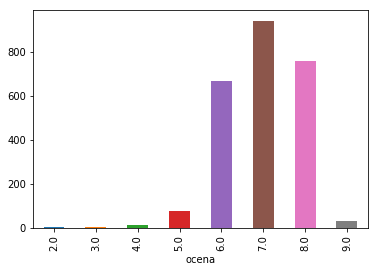

In [40]:
%matplotlib inline
stevilo_naslovov = presteto['naslov'] 
stevilo_naslovov1 = filmi_po_ocenah.size() #to in prejsnje je enako
stevilo_naslovov.head(50).plot.bar()

Dataframes have a built-in `.hist()` method that allows creating histograms for each column. Use this method to create a corresponding plot for the simplified data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A82D5D0>,
      dtype=object)

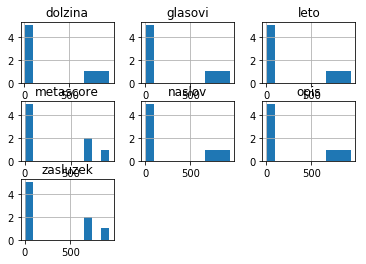

In [32]:
presteto.head(50).hist()

### Plot the average film length by year

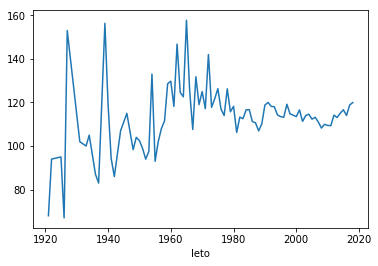

In [51]:
filmi_po_letih = filmi.groupby('leto')
povprecne_dolzine = filmi_po_letih['dolzina'].mean()
povprecne_dolzine.plot()

### Plot the sum of the revenues by year

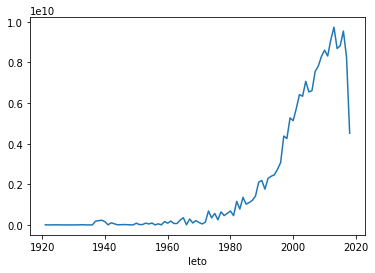

In [55]:
filmi_po_letih = filmi.groupby('leto')
letni_zasluzki = filmi_po_letih['zasluzek'].sum()
letni_zasluzki.plot()

In [56]:
filmi

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.0,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.0,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.0,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.0,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5813916,Dag II,135,2016,9.0,NaN,98201,NaN,In a desolate war zone where screams of the in...
5988370,Reis,108,2017,2.0,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
6294822,Zamolčani dokumenti,116,2017,7.0,83.0,89674,81903458.0,A cover-up that spanned four U.S. Presidents p...
